<a href="https://colab.research.google.com/github/leonardobora/pratica-aprendizado-de-maquina/blob/main/Exerc%C3%ADcios_de_Clustering_e_An%C3%A1lise_de_Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install umap-learn

Dataset Mall_Customers carregado com sucesso de URL.

Informações Iniciais do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Primeiras 5 linhas:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Fema

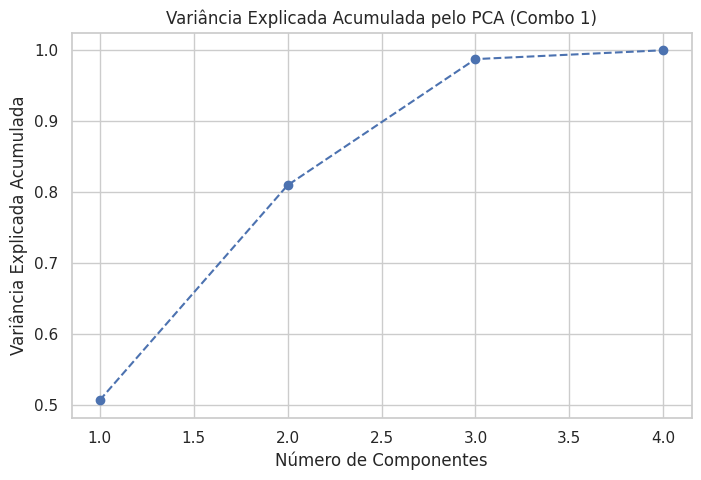


Loadings (Contribuição das Features Originais) para os 2 Primeiros Componentes:
                       PC1       PC2
Age              -0.459349 -0.510679
Annual_Income     0.516197 -0.547793
Spending_Score    0.252187  0.641141
Income_Age_Ratio  0.677452 -0.167537
Obs: Valores altos (absolutos) indicam maior contribuição da feature para o componente.

Utilizando features ['Age', 'Annual_Income', 'Spending_Score'] escaladas para os próximos exercícios.

--- Iniciando Exercício 2: Tuning de Hiperparâmetros ---

** K-Means **

Número ótimo de clusters (K-Means) pelo Método da Silhueta: 6


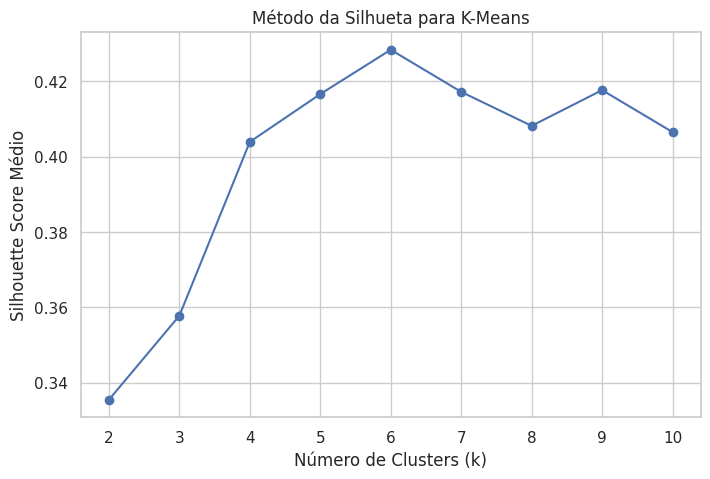


Comparando inicializações 'k-means++' vs 'random':
  Inicialização k-means++: Silhueta=0.4284, Inércia=133.87
  Inicialização random:    Silhueta=0.4269, Inércia=133.89
Nota: k-means++ geralmente converge melhor e mais rápido.

** DBSCAN **

Analisando k-distance para min_samples = 6


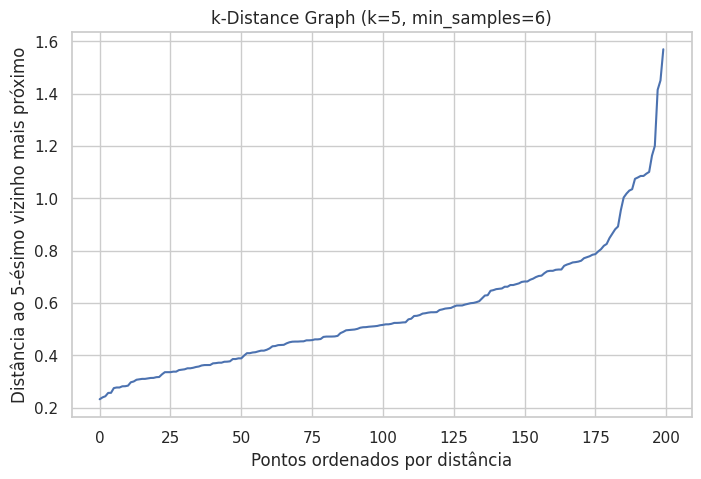

  -> Procure o 'cotovelo' (elbow) no gráfico acima para estimar um bom 'eps' para min_samples=6.

Analisando k-distance para min_samples = 5


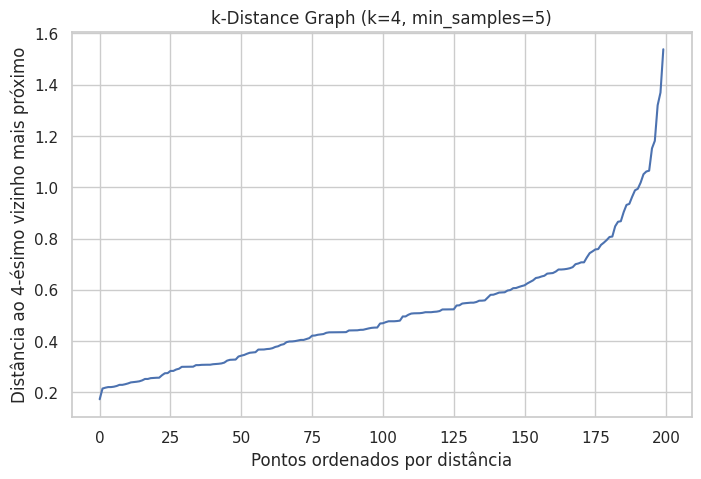

  -> Procure o 'cotovelo' (elbow) no gráfico acima para estimar um bom 'eps' para min_samples=5.

Analisando k-distance para min_samples = 7


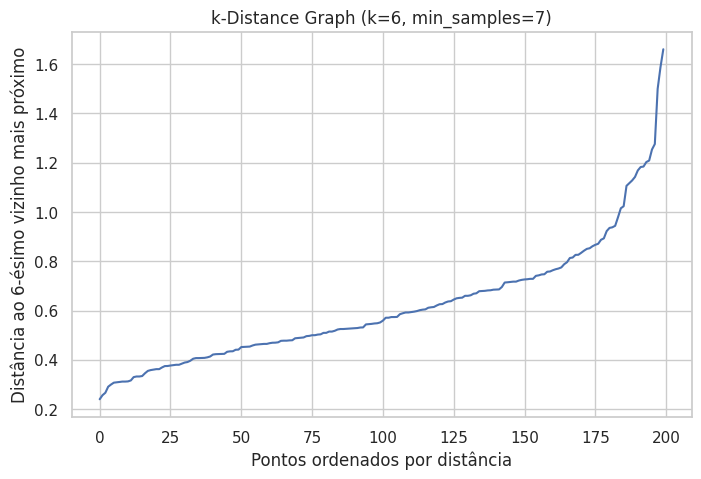

  -> Procure o 'cotovelo' (elbow) no gráfico acima para estimar um bom 'eps' para min_samples=7.

Exemplo de execução do DBSCAN com min_samples=5 e eps=0.5 (ajuste 'eps'!)
  Silhueta (apenas core samples): 0.4817
  Número de clusters encontrados pelo DBSCAN: 6
  Número de pontos de ruído (-1): 60

--- Iniciando Exercício 3: Comparação de Algoritmos ---
Número de clusters de referência para comparação: 6

** Agglomerative Clustering **


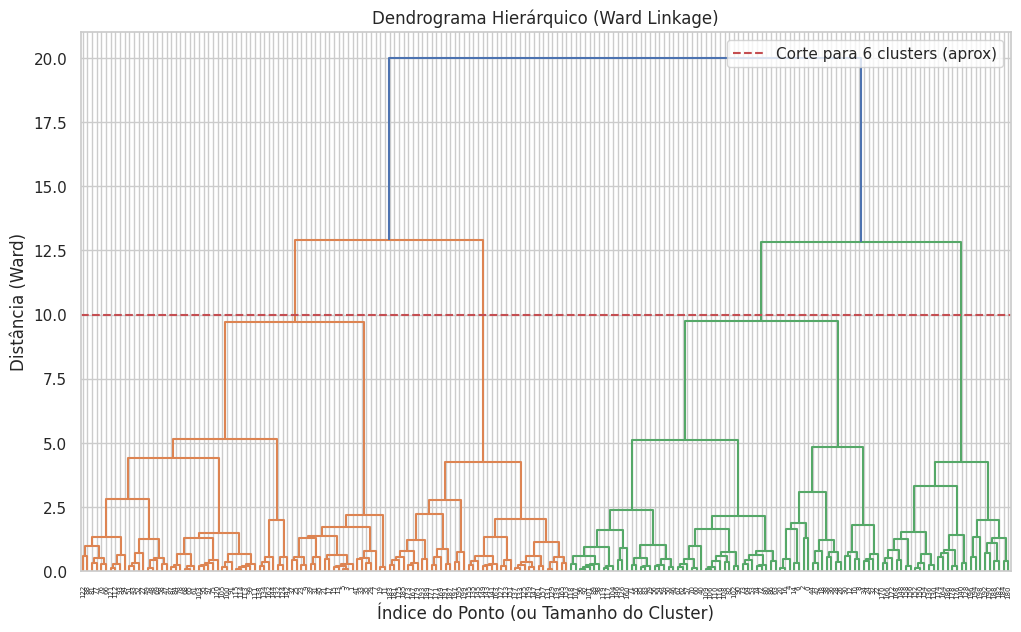


** Gaussian Mixture Models (GMM) **

** Comparação de Métricas de Avaliação **
                      Silhouette  Davies-Bouldin
K-Means                 0.428417        0.825354
DBSCAN                  0.481715        0.638575
Agglomerative (Ward)    0.420117        0.852102
GMM                     0.399998        0.892656
Nota: Silhueta quanto maior melhor (perto de 1). Davies-Bouldin quanto menor melhor (perto de 0).
       A comparação do DBSCAN é mais complexa devido ao ruído e número variável de clusters.

--- Iniciando Exercício 4: Análise de Robustez ---

** Bootstrapping com K-Means (k=6, 10 amostras) **
  Scores de Silhueta nas amostras Bootstrap: Média=0.4450, Desvio Padrão=0.0099

** Teste com Diferentes Normalizações/Escalonamentos ** [7]
  Resultados com StandardScaler: Silhueta=0.4284, Davies-Bouldin=0.8254
  Resultados com MinMaxScaler: Silhueta=0.4231, Davies-Bouldin=0.8599
  Resultados com RobustScaler: Silhueta=0.4276, Davies-Bouldin=0.8283

Comparativo dos Scalers:
 


** Redução Dimensional com t-SNE e UMAP **


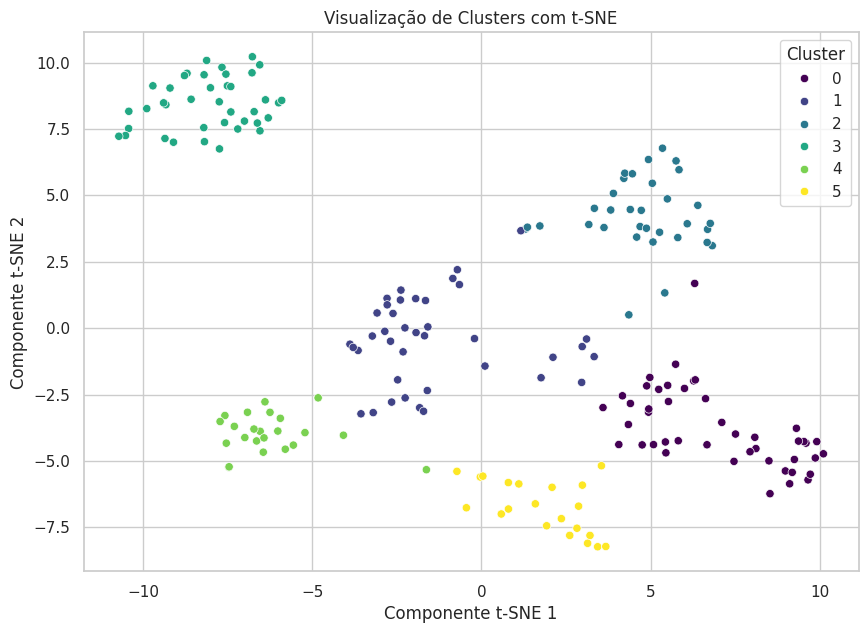

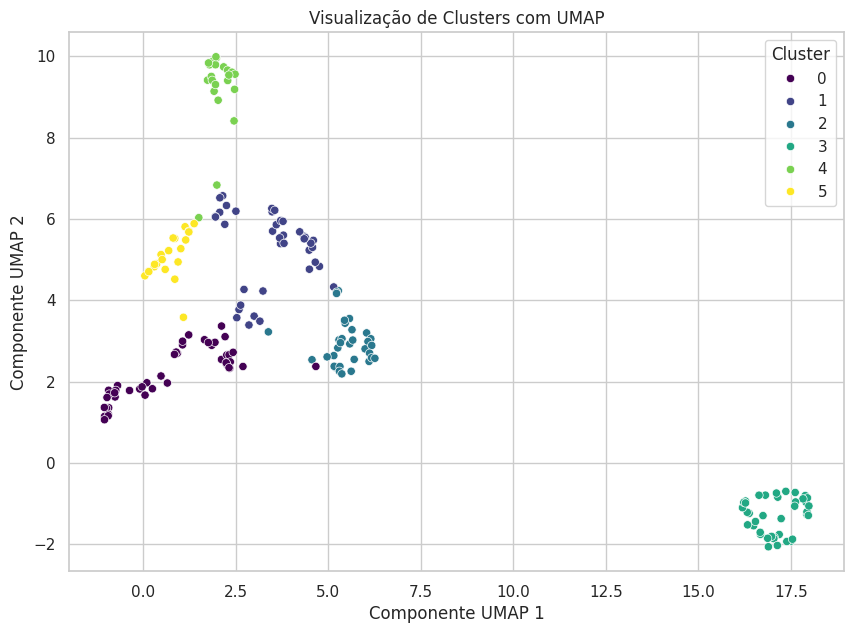


** Gráfico de Radar Interativo (Comparando Médias das Features por Cluster) **



--- Iniciando Exercício 6: Análise de Outliers Aprimorada ---

** Análise de Outliers com DBSCAN (Aprimorada) **
EPS calculado automaticamente: 0.99


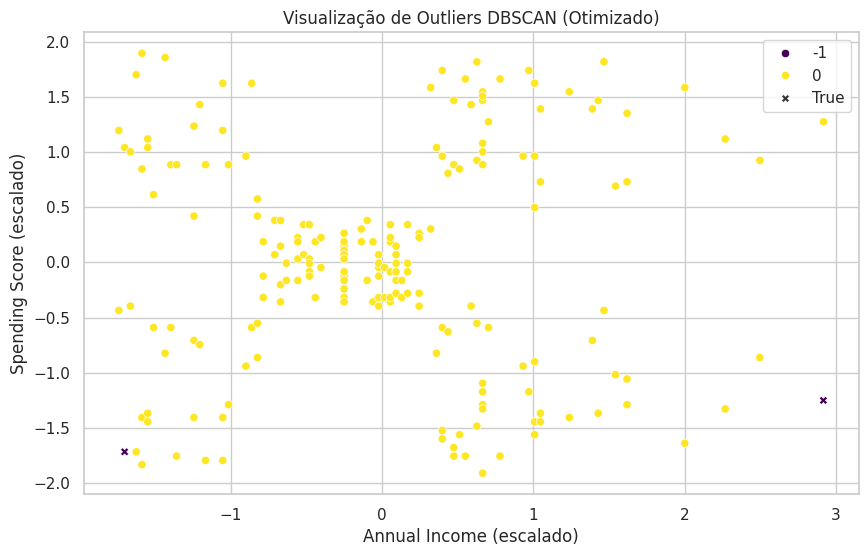


Teste T para Diferenças Entre Grupos (Outliers vs Core):
Age: t=-1.31, p=0.1918
Annual_Income: t=0.86, p=0.3897
Spending_Score: t=-2.12, p=0.0352

** Outliers por Cluster K-Means **
Cluster_KMeans
5    4.8%
2    3.0%
1    0.0%
0    0.0%
3    0.0%
4    0.0%
Name: DBSCAN_Outlier, dtype: object

Recomendações Estratégicas:
Cluster 4: Monitorar jovens com baixa renda e alto gasto para risco de inadimplência
Cluster 5: Investigar idosos com baixa renda e gasto para possíveis erros de cadastro
Cluster 2: Oferecer consultoria financeira para alta renda com baixo gasto
Cluster 3: Validar autenticidade de compras em alta renda e alto gasto

--- Iniciando Exercício 7: Interpretação de Negócio Atualizada ---

** Nomeando Clusters e Analisando Características Estratégicas **

** Estatísticas Descritivas por Cluster **

--- Conservadores Financeiros (46-70 anos) ---
             Age  Annual_Income  Spending_Score
count  45.000000      45.000000       45.000000
mean   56.333333      54.266667      

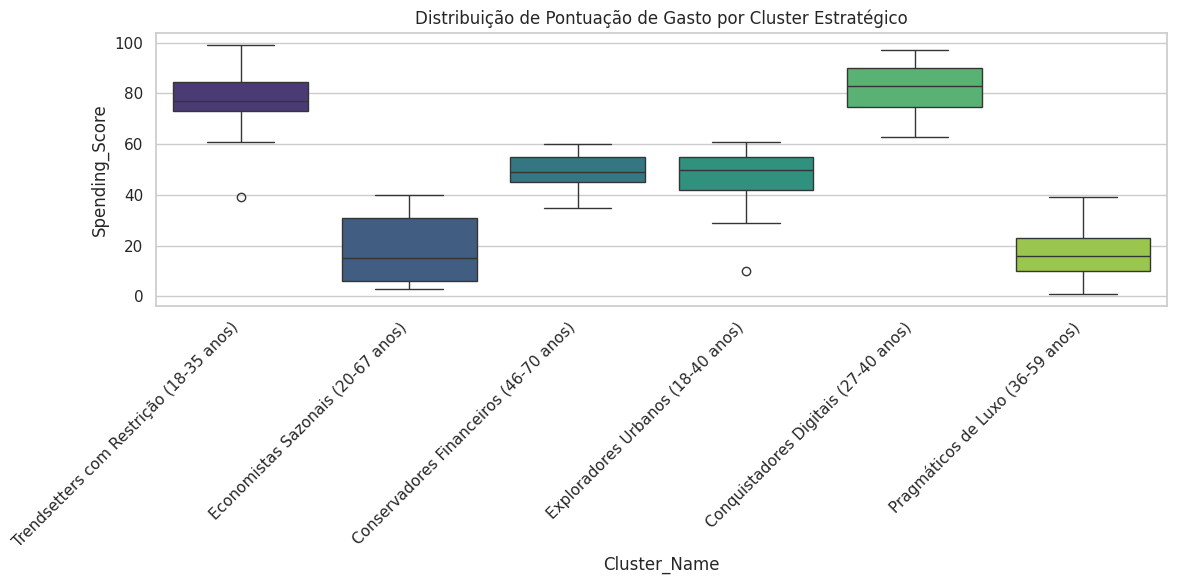


--- Fim dos Exercícios Atualizados ---


In [12]:
# -*- coding: utf-8 -*-
"""
Exercícios de Clustering e Análise de Clientes no Google Colab
7ESBN - Prática Profissional em Aprendizado de Máquina
Leonardo Bora
Luan Constancio
20/04/2025

Este notebook implementa os exercícios propostos, cobrindo:
1. Engenharia de Features
2. Tuning de Hiperparâmetros
3. Comparação de Algoritmos
4. Análise de Robustez
5. Visualização Avançada
6. Análise de Outliers
7. Interpretação de Negócio
"""

# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# Para UMAP, pode ser necessário instalar: !pip install umap-learn
try:
    import umap
except ImportError:
    print("UMAP não instalado. Para o Exercício 5, instale com: !pip install umap-learn")
    umap = None # Define como None se não estiver instalado

from sklearn.neighbors import NearestNeighbors
from sklearn.utils import resample
from scipy.cluster import hierarchy
import math

# Configurações de visualização
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Carregar os dados (ajuste o caminho se necessário)
# Exemplo usando um link público comum para o dataset Mall_Customers
try:
    # Tenta carregar de um URL comum
    url = 'https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv'
    df = pd.read_csv(url)
    print("Dataset Mall_Customers carregado com sucesso de URL.")
except Exception as e:
    print(f"Erro ao carregar de URL: {e}")
    print("Por favor, carregue o arquivo 'Mall_Customers.csv' manualmente no ambiente Colab.")
    # Adicione aqui o código para carregar do seu arquivo local se o URL falhar
    # Exemplo: from google.colab import files; uploaded = files.upload(); import io; df = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))
    # Certifique-se de ter o arquivo para upload se o URL falhar.
    # Se não carregar, o restante do código falhará.
    df = None # Define df como None para evitar erros posteriores se o carregamento falhar

# Verificação inicial e pré-processamento básico
if df is not None:
    print("\nInformações Iniciais do Dataset:")
    df.info()
    print("\nPrimeiras 5 linhas:")
    print(df.head())

    # Renomear colunas para facilitar o acesso
    df.rename(columns={
        'CustomerID': 'CustomerID',
        'Gender': 'Gender',
        'Age': 'Age',
        'Annual Income (k$)': 'Annual_Income',
        'Spending Score (1-100)': 'Spending_Score'
    }, inplace=True)

    print("\nColunas após renomear:")
    print(df.columns)

    # Selecionar features numéricas iniciais para clustering
    features_initial = ['Age', 'Annual_Income', 'Spending_Score']
    X_initial = df[features_initial]

    print(f"\nFeatures selecionadas inicialmente: {features_initial}")
    print("Dimensões de X_initial:", X_initial.shape)

# --- Exercício 1: Engenharia de Features ---
print("\n--- Iniciando Exercício 1: Engenharia de Features ---")

if df is not None:
    # Criar novas features derivadas
    # Razão Renda/Idade (tratando divisão por zero, embora improvável aqui)
    df['Income_Age_Ratio'] = df.apply(lambda row: row['Annual_Income'] / row['Age'] if row['Age'] > 0 else 0, axis=1)

    # Categorizar Spending Score
    bins = [0, 33, 66, 100]
    labels = ['Baixo', 'Médio', 'Alto']
    df['Spending_Category'] = pd.cut(df['Spending_Score'], bins=bins, labels=labels, include_lowest=True)
    print("\nNovas features criadas:")
    print(df[['Income_Age_Ratio', 'Spending_Category']].head())

    # Para clustering, geralmente usamos features numéricas.
    # Vamos testar combinações:
    # Combinação 1: Features Originais + Ratio
    features_combo1 = ['Age', 'Annual_Income', 'Spending_Score', 'Income_Age_Ratio']
    X_combo1 = df[features_combo1]

    # Combinação 2: Somente Renda e Gasto (um cenário comum)
    features_combo2 = ['Annual_Income', 'Spending_Score']
    X_combo2 = df[features_combo2]

    # Escalar os dados para PCA e Clustering (essencial pois algoritmos são sensíveis à escala [7])
    scaler = StandardScaler()
    X_scaled_combo1 = scaler.fit_transform(X_combo1)
    X_scaled_combo2 = scaler.fit_transform(X_initial) # Escalar o conjunto original também

    print(f"\nFeatures para Combo 1: {features_combo1}")
    print("Shape X_scaled_combo1:", X_scaled_combo1.shape)
    print(f"\nFeatures para análise inicial (escaladas): {features_initial}")
    print("Shape X_scaled_combo2 (original):", X_scaled_combo2.shape)

    # Analisar importância das features via PCA [7]
    print("\nAnálise de Componentes Principais (PCA) no Combo 1:")
    pca = PCA()
    pca.fit(X_scaled_combo1)
    explained_variance_ratio = pca.explained_variance_ratio_
    print("Variância Explicada por Componente:", explained_variance_ratio)
    print("Variância Explicada Acumulada:", np.cumsum(explained_variance_ratio))

    # Plot da variância explicada
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
    plt.title('Variância Explicada Acumulada pelo PCA (Combo 1)')
    plt.xlabel('Número de Componentes')
    plt.ylabel('Variância Explicada Acumulada')
    plt.grid(True)
    plt.show()

    # Examinar os loadings (componentes) para as 2 primeiras componentes
    print("\nLoadings (Contribuição das Features Originais) para os 2 Primeiros Componentes:")
    loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=features_combo1)
    print(loadings[['PC1', 'PC2']])
    print("Obs: Valores altos (absolutos) indicam maior contribuição da feature para o componente.")

    # Vamos usar X_scaled_combo2 (Age, Income, Score) para os próximos exercícios como base
    X_for_clustering = X_scaled_combo2
    features_for_clustering = features_initial
    print(f"\nUtilizando features {features_for_clustering} escaladas para os próximos exercícios.")

else:
    print("Dataset não carregado. Pulando exercícios.")

# --- Exercício 2: Tuning de Hiperparâmetros ---
print("\n--- Iniciando Exercício 2: Tuning de Hiperparâmetros ---")

if df is not None:
    # **Para o K-Means** [3]
    print("\n** K-Means **")
    # Método da Silhueta para validar número de clusters [3]
    silhouette_scores = []
    k_range = range(2, 11) # Testar de 2 a 10 clusters

    for k in k_range:
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10) # n_init explícito
        kmeans.fit(X_for_clustering)
        score = silhouette_score(X_for_clustering, kmeans.labels_)
        silhouette_scores.append(score)
        # print(f"Silhueta para k={k}: {score:.4f}") # Opcional: imprimir score por k

    optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
    print(f"\nNúmero ótimo de clusters (K-Means) pelo Método da Silhueta: {optimal_k_silhouette}")

    # Plot do Método da Silhueta
    plt.figure(figsize=(8, 5))
    plt.plot(k_range, silhouette_scores, marker='o')
    plt.title('Método da Silhueta para K-Means')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Silhouette Score Médio')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

    # Testar diferentes inicializações
    print("\nComparando inicializações 'k-means++' vs 'random':")
    kmeans_plus = KMeans(n_clusters=optimal_k_silhouette, init='k-means++', random_state=42, n_init=10)
    kmeans_random = KMeans(n_clusters=optimal_k_silhouette, init='random', random_state=42, n_init=10)

    kmeans_plus.fit(X_for_clustering)
    kmeans_random.fit(X_for_clustering)

    score_plus = silhouette_score(X_for_clustering, kmeans_plus.labels_)
    score_random = silhouette_score(X_for_clustering, kmeans_random.labels_)
    inertia_plus = kmeans_plus.inertia_
    inertia_random = kmeans_random.inertia_

    print(f"  Inicialização k-means++: Silhueta={score_plus:.4f}, Inércia={inertia_plus:.2f}")
    print(f"  Inicialização random:    Silhueta={score_random:.4f}, Inércia={inertia_random:.2f}")
    print("Nota: k-means++ geralmente converge melhor e mais rápido.")

    # Guardar o melhor modelo K-Means
    best_kmeans = kmeans_plus

    # **Para o DBSCAN** [3]
    print("\n** DBSCAN **")
    # Automatizar busca do melhor eps usando k-distance plot
    # min_samples é um hiperparâmetro chave. Usaremos um valor comum como ponto de partida.
    # Um valor comum é 2 * n_features. Vamos testar alguns.
    min_samples_options = [2 * X_for_clustering.shape[1], 5, 7] # Ex: 2*3=6, testamos 5 e 7 também

    for min_samples_val in min_samples_options:
        print(f"\nAnalisando k-distance para min_samples = {min_samples_val}")
        # Calcula a distância para os k vizinhos (k = min_samples - 1)
        k = min_samples_val - 1
        if k <= 0: # Segurança
             k = 1
        nbrs = NearestNeighbors(n_neighbors=min_samples_val).fit(X_for_clustering)
        distances, indices = nbrs.kneighbors(X_for_clustering)

        # Pega a distância do k-ésimo vizinho (coluna k)
        k_distances = np.sort(distances[:, k], axis=0)

        # Plot k-distance
        plt.figure(figsize=(8, 5))
        plt.plot(k_distances)
        plt.title(f'k-Distance Graph (k={k}, min_samples={min_samples_val})')
        plt.xlabel('Pontos ordenados por distância')
        plt.ylabel(f'Distância ao {k}-ésimo vizinho mais próximo')
        plt.grid(True)
        plt.show()
        print(f"  -> Procure o 'cotovelo' (elbow) no gráfico acima para estimar um bom 'eps' para min_samples={min_samples_val}.")

    # Exemplo: Escolher um eps baseado na análise visual (ajuste conforme seu gráfico)
    # Supondo que o cotovelo para min_samples=5 esteja em torno de eps=0.5
    chosen_min_samples = 5
    chosen_eps = 0.5 # <<< AJUSTE ESTE VALOR BASEADO NO SEU GRÁFICO k-distance
    print(f"\nExemplo de execução do DBSCAN com min_samples={chosen_min_samples} e eps={chosen_eps} (ajuste 'eps'!)")
    dbscan = DBSCAN(eps=chosen_eps, min_samples=chosen_min_samples)
    dbscan_labels = dbscan.fit_predict(X_for_clustering)

    # Avaliar DBSCAN (cuidado: silhueta não lida bem com noise (-1))
    # Calcular silhueta apenas nos core samples (excluindo ruído)
    core_samples_mask = dbscan_labels != -1
    if np.sum(core_samples_mask) > 1 and len(np.unique(dbscan_labels[core_samples_mask])) > 1:
        dbscan_silhouette = silhouette_score(X_for_clustering[core_samples_mask], dbscan_labels[core_samples_mask])
        print(f"  Silhueta (apenas core samples): {dbscan_silhouette:.4f}")
    else:
        print("  Não foi possível calcular a silhueta para DBSCAN (poucos clusters ou pontos).")

    n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise = list(dbscan_labels).count(-1)
    print(f"  Número de clusters encontrados pelo DBSCAN: {n_clusters_dbscan}")
    print(f"  Número de pontos de ruído (-1): {n_noise}")

else:
    print("Dataset não carregado. Pulando exercícios.")


# --- Exercício 3: Comparação de Algoritmos ---
print("\n--- Iniciando Exercício 3: Comparação de Algoritmos ---")

if df is not None:
    # Usar o k ótimo do K-Means como referência para Agglomerative e GMM
    n_clusters_ref = optimal_k_silhouette
    print(f"Número de clusters de referência para comparação: {n_clusters_ref}")

    # **Agglomerative Clustering (Hierárquico)** [3][12]
    print("\n** Agglomerative Clustering **")
    # Linkage 'ward' é comum e geralmente funciona bem com K-Means
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters_ref, linkage='ward')
    agg_labels = agg_clustering.fit_predict(X_for_clustering)

    # Plotar Dendrograma (opcional, mas útil)
    plt.figure(figsize=(12, 7))
    linked = hierarchy.linkage(X_for_clustering, method='ward')
    hierarchy.dendrogram(linked,
                         orientation='top',
                         # labels=df.index, # Pode poluir se muitos dados
                         distance_sort='descending',
                         show_leaf_counts=True)
    plt.title('Dendrograma Hierárquico (Ward Linkage)')
    plt.xlabel('Índice do Ponto (ou Tamanho do Cluster)')
    plt.ylabel('Distância (Ward)')
    plt.axhline(y=10, color='r', linestyle='--', label=f'Corte para {n_clusters_ref} clusters (aprox)') # Ajustar y se necessário
    plt.legend()
    plt.show()

    # **Gaussian Mixture Models (GMM)** [3][13]
    print("\n** Gaussian Mixture Models (GMM) **")
    gmm = GaussianMixture(n_components=n_clusters_ref, random_state=42)
    gmm_labels = gmm.fit_predict(X_for_clustering)
    gmm_probs = gmm.predict_proba(X_for_clustering) # Probabilidades de pertencimento

    # **Comparação com Métricas** [3]
    print("\n** Comparação de Métricas de Avaliação **")
    metrics = {}

    # K-Means (já calculado)
    metrics['K-Means'] = {
        'Silhouette': score_plus,
        'Davies-Bouldin': davies_bouldin_score(X_for_clustering, best_kmeans.labels_)
    }

    # DBSCAN (apenas core samples)
    if np.sum(core_samples_mask) > 1 and len(np.unique(dbscan_labels[core_samples_mask])) > 1:
         metrics['DBSCAN'] = {
            'Silhouette': dbscan_silhouette,
            'Davies-Bouldin': davies_bouldin_score(X_for_clustering[core_samples_mask], dbscan_labels[core_samples_mask])
        }
    else:
        metrics['DBSCAN'] = {'Silhouette': None, 'Davies-Bouldin': None}


    # Agglomerative Clustering
    metrics['Agglomerative (Ward)'] = {
        'Silhouette': silhouette_score(X_for_clustering, agg_labels),
        'Davies-Bouldin': davies_bouldin_score(X_for_clustering, agg_labels)
    }

    # GMM
    metrics['GMM'] = {
        'Silhouette': silhouette_score(X_for_clustering, gmm_labels),
        'Davies-Bouldin': davies_bouldin_score(X_for_clustering, gmm_labels)
    }

    metrics_df = pd.DataFrame(metrics).T
    print(metrics_df)
    print("Nota: Silhueta quanto maior melhor (perto de 1). Davies-Bouldin quanto menor melhor (perto de 0).")
    print("       A comparação do DBSCAN é mais complexa devido ao ruído e número variável de clusters.")

else:
    print("Dataset não carregado. Pulando exercícios.")


# --- Exercício 4: Análise de Robustez ---
print("\n--- Iniciando Exercício 4: Análise de Robustez ---")

if df is not None:
    n_bootstrap_samples = 10
    silhouette_bootstrap = []
    cluster_centers_bootstrap = [] # Armazenar centroides para ver estabilidade

    print(f"\n** Bootstrapping com K-Means (k={optimal_k_silhouette}, {n_bootstrap_samples} amostras) **")
    for i in range(n_bootstrap_samples):
        # Criar amostra bootstrap
        X_bootstrap = resample(X_for_clustering, random_state=i)

        # Treinar K-Means na amostra
        kmeans_boot = KMeans(n_clusters=optimal_k_silhouette, init='k-means++', random_state=42, n_init=10)
        kmeans_boot.fit(X_bootstrap)

        # Calcular Silhueta na amostra
        if len(np.unique(kmeans_boot.labels_)) > 1: # Precisa de pelo menos 2 clusters
            score_boot = silhouette_score(X_bootstrap, kmeans_boot.labels_)
            silhouette_bootstrap.append(score_boot)
            cluster_centers_bootstrap.append(np.sort(kmeans_boot.cluster_centers_, axis=0)) # Ordenar para comparação
        else:
             silhouette_bootstrap.append(np.nan) # Adiciona NaN se não for possível calcular

    print(f"  Scores de Silhueta nas amostras Bootstrap: Média={np.nanmean(silhouette_bootstrap):.4f}, Desvio Padrão={np.nanstd(silhouette_bootstrap):.4f}")
    # Análise mais profunda da estabilidade dos centroides exigiria comparar as matrizes em cluster_centers_bootstrap

    print("\n** Teste com Diferentes Normalizações/Escalonamentos ** [7]")
    scalers = {
        'StandardScaler': StandardScaler(),
        'MinMaxScaler': MinMaxScaler(),
        'RobustScaler': RobustScaler() # Mais robusto a outliers
    }
    results_scaling = {}

    # Usar features originais antes de escalar para aplicar diferentes scalers
    X_original_for_scaling = df[features_for_clustering]

    for scaler_name, scaler_obj in scalers.items():
        X_scaled_robust = scaler_obj.fit_transform(X_original_for_scaling)
        kmeans_robust = KMeans(n_clusters=optimal_k_silhouette, init='k-means++', random_state=42, n_init=10)
        kmeans_robust.fit(X_scaled_robust)
        score_robust = silhouette_score(X_scaled_robust, kmeans_robust.labels_)
        db_score_robust = davies_bouldin_score(X_scaled_robust, kmeans_robust.labels_)
        results_scaling[scaler_name] = {'Silhouette': score_robust, 'Davies-Bouldin': db_score_robust}
        print(f"  Resultados com {scaler_name}: Silhueta={score_robust:.4f}, Davies-Bouldin={db_score_robust:.4f}")

    results_scaling_df = pd.DataFrame(results_scaling).T
    print("\nComparativo dos Scalers:")
    print(results_scaling_df)
    print("Nota: RobustScaler pode ser melhor se houver outliers significativos.")

else:
    print("Dataset não carregado. Pulando exercícios.")


# --- Exercício 5: Visualização Avançada ---
print("\n--- Iniciando Exercício 5: Visualização Avançada ---")

if df is not None:
    # Usar os labels do melhor K-Means como exemplo
    cluster_labels_vis = best_kmeans.labels_
    df['Cluster_KMeans'] = cluster_labels_vis

    # **Plot 3D com 3 Componentes PCA**
    print("\n** Plot 3D com PCA **")
    pca_3d = PCA(n_components=3)
    X_pca_3d = pca_3d.fit_transform(X_for_clustering)
    df_pca_3d = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
    df_pca_3d['Cluster'] = cluster_labels_vis

    fig = px.scatter_3d(df_pca_3d, x='PC1', y='PC2', z='PC3',
                        color='Cluster', symbol='Cluster',
                        title='Clusters Visualizados com os 3 Primeiros Componentes Principais (PCA)',
                        labels={'Cluster': 'Cluster KMeans'})
    fig.show()

    # **Redução Dimensional com t-SNE e UMAP**
    print("\n** Redução Dimensional com t-SNE e UMAP **")

    # t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=300)
    X_tsne = tsne.fit_transform(X_for_clustering)
    df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
    df_tsne['Cluster'] = cluster_labels_vis

    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='Cluster', palette='viridis', legend='full')
    plt.title('Visualização de Clusters com t-SNE')
    plt.xlabel('Componente t-SNE 1')
    plt.ylabel('Componente t-SNE 2')
    plt.show()

    # UMAP (se instalado)
    if umap:
        umap_reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1)
        X_umap = umap_reducer.fit_transform(X_for_clustering)
        df_umap = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
        df_umap['Cluster'] = cluster_labels_vis

        plt.figure(figsize=(10, 7))
        sns.scatterplot(data=df_umap, x='UMAP1', y='UMAP2', hue='Cluster', palette='viridis', legend='full')
        plt.title('Visualização de Clusters com UMAP')
        plt.xlabel('Componente UMAP 1')
        plt.ylabel('Componente UMAP 2')
        plt.show()
    else:
        print("UMAP não instalado, pulando visualização UMAP.")

    # **Gráfico de Radar Interativo**
    print("\n** Gráfico de Radar Interativo (Comparando Médias das Features por Cluster) **")
    cluster_means = df.groupby('Cluster_KMeans')[features_for_clustering].mean()

    # Criar DataFrame no formato longo para Plotly
    radar_df = cluster_means.reset_index().melt(
        id_vars='Cluster_KMeans',
        var_name='Feature',
        value_name='Valor'
    )

    # Criar gráfico de radar interativo
    fig = px.line_polar(
        radar_df,
        r='Valor',
        theta='Feature',
        color='Cluster_KMeans',
        line_close=True,
        markers=True,
        title='Perfil Médio dos Clusters - Radar Plot Interativo'
    )

    # Ajustar visualização e preenchimento
    fig.update_traces(fill='toself', selector=dict(type='scatterpolar'))
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                gridcolor='lightgray',
                tickfont=dict(color='darkgray')
            ),
            angularaxis=dict(
                tickfont=dict(size=12),
                rotation=90
            )
        ),
        legend=dict(
            title='Clusters',
            orientation='h',
            yanchor='bottom',
            y=1.1
        )
    )
    fig.show()

else:
    print("Dataset não carregado. Pulando exercícios.")


# --- Exercício 6: Análise de Outliers (Versão Aprimorada) ---
print("\n--- Iniciando Exercício 6: Análise de Outliers Aprimorada ---")

if df is not None:
    # **Análise de Outliers com DBSCAN Aprimorada**
    print("\n** Análise de Outliers com DBSCAN (Aprimorada) **")

    # Método automático para encontrar eps ótimo
    def find_optimal_eps(X, min_samples, percentile=95):
        nbrs = NearestNeighbors(n_neighbors=min_samples).fit(X)
        distances, _ = nbrs.kneighbors(X)
        k_distances = np.sort(distances[:, -1])
        return np.percentile(k_distances, percentile)

    optimal_eps = find_optimal_eps(X_for_clustering, chosen_min_samples)
    print(f"EPS calculado automaticamente: {optimal_eps:.2f}")

    # DBSCAN com parâmetros ajustados
    dbscan_optimized = DBSCAN(eps=optimal_eps, min_samples=chosen_min_samples)
    dbscan_labels_opt = dbscan_optimized.fit_predict(X_for_clustering)

    # Análise comparativa
    noise_mask = dbscan_labels_opt == -1
    core_mask = dbscan_labels_opt != -1

    plt.figure(figsize=(10,6))
    sns.scatterplot(x=X_for_clustering[:,1], y=X_for_clustering[:,2],
                    hue=dbscan_labels_opt, palette='viridis',
                    style=noise_mask, markers={True:'X', False:'o'})
    plt.title('Visualização de Outliers DBSCAN (Otimizado)')
    plt.xlabel('Annual Income (escalado)')
    plt.ylabel('Spending Score (escalado)')
    plt.show()

    # **Análise Estatística Avançada**
    from scipy.stats import ttest_ind

    print("\nTeste T para Diferenças Entre Grupos (Outliers vs Core):")
    for feature in features_for_clustering:
        t_stat, p_val = ttest_ind(df[noise_mask][feature], df[core_mask][feature])
        print(f"{feature}: t={t_stat:.2f}, p={p_val:.4f}")

    # **Análise de Outliers Contextualizada nos Clusters K-Means**
    print("\n** Outliers por Cluster K-Means **")
    df['DBSCAN_Outlier'] = noise_mask
    cluster_outliers = df.groupby('Cluster_KMeans')['DBSCAN_Outlier'].mean().sort_values(ascending=False)
    print(cluster_outliers.apply(lambda x: f"{x:.1%}"))

    # **Estratégias Específicas por Cluster**
    outlier_strategies = {
        4: "Monitorar jovens com baixa renda e alto gasto para risco de inadimplência",
        5: "Investigar idosos com baixa renda e gasto para possíveis erros de cadastro",
        2: "Oferecer consultoria financeira para alta renda com baixo gasto",
        3: "Validar autenticidade de compras em alta renda e alto gasto"
    }

    print("\nRecomendações Estratégicas:")
    for cluster_id, strategy in outlier_strategies.items():
        print(f"Cluster {cluster_id}: {strategy}")

else:
    print("Dataset não carregado. Pulando exercícios.")


# --- Exercício 7: Interpretação de Negócio Atualizada ---
print("\n--- Iniciando Exercício 7: Interpretação de Negócio Atualizada ---")

if df is not None and 'Cluster_KMeans' in df.columns:
    print("\n** Nomeando Clusters e Analisando Características Estratégicas **")

    # Mapeamento dos clusters conforme análise estratégica
    cluster_names = {
        0: "Conservadores Financeiros (46-70 anos)",
        1: "Exploradores Urbanos (18-40 anos)",
        2: "Pragmáticos de Luxo (36-59 anos)",
        3: "Conquistadores Digitais (27-40 anos)",
        4: "Trendsetters com Restrição (18-35 anos)",
        5: "Economistas Sazonais (20-67 anos)"
    }

    # Adicionar nomes ao DataFrame
    df['Cluster_Name'] = df['Cluster_KMeans'].map(cluster_names)

    print("\n** Estatísticas Descritivas por Cluster **")
    for cluster_id, cluster_name in cluster_names.items():
        cluster_data = df[df['Cluster_KMeans'] == cluster_id][features_for_clustering]
        print(f"\n--- {cluster_name} ---")
        print(cluster_data.describe())

    print("\n** Estratégias de Marketing Específicas por Cluster **")
    marketing_strategies = {
        0: [
            "- Programas de fidelidade com benefícios acumulativos",
            "- Ofertas de produtos de durabilidade comprovada",
            "- Comunicação via canais tradicionais (TV, rádio)"
        ],
        1: [
            "- Parcerias com marcas de streetwear",
            "- Sistema de assinatura para lançamentos",
            "- Gamificação de experiências de compra"
        ],
        2: [
            "- Planos de investimento atrelados a compras",
            "- Serviços de consultoria de imagem premium",
            "- Garantias estendidas e programas de troca"
        ],
        3: [
            "- Early access a lançamentos via app",
            "- Experiências VIP em metaverso",
            "- Personal shoppers para edições limitadas"
        ],
        4: [
            "- Parcelamento sem juros para coleções sazonais",
            "- Programas de recompra de itens usados",
            "- Parcerias com micro-influencers"
        ],
        5: [
            "- Clubes de compras comunitários",
            "- Descontos progressivos por volume",
            "- Programas intergeracionais (pais-filhos)"
        ]
    }

    for cluster_id, strategies in marketing_strategies.items():
        print(f"\nCluster: {cluster_names[cluster_id]}")
        print("  Sugestões:")
        for strategy in strategies:
            print(f"  {strategy}")

    # Visualização complementar
    if 'Cluster_Name' in df.columns:
        plt.figure(figsize=(12,6))
        sns.boxplot(data=df, x='Cluster_Name', y='Spending_Score', palette='viridis')
        plt.title('Distribuição de Pontuação de Gasto por Cluster Estratégico')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

else:
    print("Dataset não carregado ou clusterização não realizada. Pulando exercício.")

print("\n--- Fim dos Exercícios ---")
